In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
#X, y 독립변수와 종속변수와의 관계
np.random.seed(123)
n_samples = 1000

In [3]:
#특성 피처들 생성
X1 = np.random.rand(n_samples) * 100 #X1 y와 상관관계가 높도록 설정
X2 = np.random.rand(n_samples) * 100 #X2도 y와 상관관계 높다
X3 = np.random.rand(n_samples) * 100 #X3 y와 상관관계 약함
X4 = np.random.rand(n_samples) * 100 #X4 y와 거의 상관관계 없음
X_noise = np.random.rand(n_samples) * 100 #노이즈

#X1, X2 강하게 의존하는 형태, 나머지는 거의 영향이 없음
y = 3*X1 + 2*X2 + np.random.randn(n_samples) * 10

In [4]:
df = pd.DataFrame({
    'X1':X1,
    'X2':X2,
    'X3':X3,
    'X4':X4,
    'X_noise':X_noise,
    'y':y
})

In [5]:
#상관계수를 확인하기
df.corr()

,X1,X2,X3,X4,X_noise,y
X1,1.000000,-0.047136,0.039437,-0.020240,-0.022534,0.805631
X2,-0.047136,1.000000,-0.069586,0.031232,0.016793,0.545822
X3,0.039437,-0.069586,1.000000,0.025532,-0.046728,-0.003880
X4,-0.020240,0.031232,0.025532,1.000000,-0.005264,0.001766
X_noise,-0.022534,0.016793,-0.046728,-0.005264,1.000000,-0.006337
y,0.805631,0.545822,-0.003880,0.001766,-0.006337,1.000000


In [6]:
#corr_matrix
#df의 상관관계 중에서 'y'를 선택
#선택 이후에 자기 자신의 값인 'y'는 drop해서 보여주게 한다.
corr_matrix = df.corr()['y'].drop('y')

In [7]:
corr_matrix

X1         0.805631
X2         0.545822
X3        -0.003880
X4         0.001766
X_noise   -0.006337
Name: y, dtype: float64

In [8]:
#0.5 특성만 뽑아보자 -> 상관관계가 높은 것들만 골라내는 것
threshold = 0.5
selected_features = corr_matrix[abs(corr_matrix)>threshold].index

selected_features

Index(['X1', 'X2'], dtype='object')

In [9]:
#LinearRegression

#데이터 분할_선택된 피처로
X_selected = df[selected_features]
X_train, X_test, y_train, y_test = train_test_split(X_selected, df['y'], test_size = 0.3, random_state=42)

#모델학습
model = LinearRegression()
model.fit(X_train, y_train)

#예측 MSE
y_pred = model.predict(X_test)
mse_selected = mean_squared_error(y_test, y_pred)
print('mse_selected : ', mse_selected)

mse_selected :  110.75865743689343


In [10]:
#전체 데이터랑 비교

#LinearRegression

#데이터 분할_선택된 피처로
X_full = df.drop(columns = ['y'])
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_full, df['y'], test_size = 0.3, random_state=42)

#모델학습
model_full = LinearRegression()
model_full.fit(X_train_full, y_train_full)

#예측 MSE
y_pred_full = model_full.predict(X_test_full)
mse_full = mean_squared_error(y_test_full, y_pred_full)
print('mse_full : ', mse_full)

mse_full :  111.05108455833616


In [11]:
110.75865743689343 - 111.05108455833616

-0.29242712144272787

In [12]:
#특성 피처들 생성
X1 = np.random.rand(n_samples) * 100 #X1 y와 상관관계가 높도록 설정
X2 = np.random.rand(n_samples) * 100 #X2도 y와 상관관계 높다
X3 = np.random.rand(n_samples) * 100 #X3 y와 상관관계 약함
X4 = np.random.rand(n_samples) * 100 #X4 y와 거의 상관관계 없음
X_noise = np.random.rand(n_samples) * 100 #노이즈

#X1, X2 강하게 의존하는 형태, 나머지는 거의 영향이 없음
y = 3*X1 + 2*X2 + np.random.randn(n_samples) * 10

In [13]:
df=pd.DataFrame({
    'X1':X1,
    'X2':X2,
    'X3':X3,
    'X4':X4,
    'X_noise':X_noise,
    'y':y
})

In [14]:
import seaborn as sns

In [15]:
#상관관계를 확인

#corr_matrix
corr_matrix = df.drop(columns = ['y']).corr()
print(corr_matrix)

               X1        X2        X3        X4   X_noise
X1       1.000000 -0.038494 -0.012903 -0.085100  0.051621
X2      -0.038494  1.000000  0.012125 -0.008515  0.019303
X3      -0.012903  0.012125  1.000000 -0.010658 -0.047799
X4      -0.085100 -0.008515 -0.010658  1.000000 -0.042149
X_noise  0.051621  0.019303 -0.047799 -0.042149  1.000000


<Axes: >

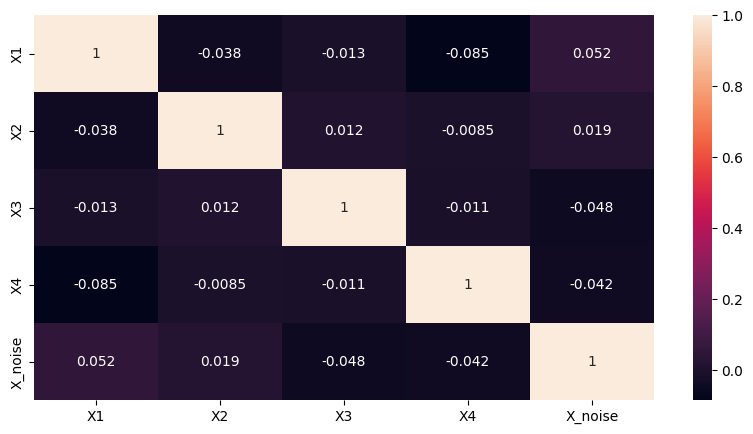

In [16]:
#상관관계 시각화
plt.figure(figsize=(10,5))
sns.heatmap(corr_matrix, annot=True)

In [17]:
corr_matrix

,X1,X2,X3,X4,X_noise
X1,1.000000,-0.038494,-0.012903,-0.085100,0.051621
X2,-0.038494,1.000000,0.012125,-0.008515,0.019303
X3,-0.012903,0.012125,1.000000,-0.010658,-0.047799
X4,-0.085100,-0.008515,-0.010658,1.000000,-0.042149
X_noise,0.051621,0.019303,-0.047799,-0.042149,1.000000


In [18]:
#상관계수가 threshold 0.8 이상인 경우는 제거를 한다.
#X1, X2 상관관계가 높다 -> 왜 제거를 해야하나?
#X1, X2 상관관계가 높다 -> 같이 움직인다. X1이 증가하면 X2도 증가한다는 뜻. 같이 움직이므로 선형회귀에서 오차 계산 등이 오차 값이 계산될 때 더 큰 영향을 준다.

threshold = 0.8
to_drop = set() #to_drop은 제거할 특성 변수의 이름을 저장하기 위한 빈 집합(set)이다.

#상관계수가 높은 피처만 출력
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i,j])>threshold:
            to_drop.add(corr_matrix.columns[i])
print(to_drop)

#원하는 피처만 제거함
X_reduced = df.drop(columns = list(to_drop) + ['y'])

X_train, X_test, y_train, y_test = train_test_split(X_reduced, df['y'], test_size = 0.2, random_state=42)

set()


In [19]:
#상관계수가 높은 피처를 제거했을 때
#모델학습
model = LinearRegression()
model.fit(X_train, y_train)

#예측 MSE
y_pred = model.predict(X_test)
mse_selected = mean_squared_error(y_test, y_pred)
print('mse_selected : ', mse_selected)

mse_selected :  94.29153309417038


In [20]:
#전체 피처가 다 들어간 경우
#데이터 분할_선택된 피처로
X_full = df.drop(columns = ['y'])
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_full, df['y'], test_size = 0.3, random_state = 42)

#모델학습
model_full = LinearRegression()
model_full.fit(X_train_full, y_train_full)

#예측 MSE
y_pred_full = model_full.predict(X_test_full)
mse_full = mean_squared_error(y_test_full, y_pred_full)
print('mse_full : ', mse_full)

mse_full :  100.70603641172119
